In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,make_scorer,classification_report,f1_score


In [7]:
df=pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
275691,166678.0,1.837457,-0.911822,-0.849793,-1.743789,-0.094710,0.777491,-0.717053,0.368884,1.772744,...,-0.080366,0.015880,0.379805,-1.343213,-0.632159,-0.468930,0.073163,-0.055840,38.91,0
125053,77519.0,1.179516,0.240266,0.714998,0.693126,-0.523100,-0.819470,0.018896,-0.120547,-0.046835,...,-0.190767,-0.504117,0.227570,0.610550,0.085024,0.090109,-0.009682,0.021773,1.98,0
34529,37711.0,0.526892,-0.893415,-0.243560,1.678423,-0.634120,-0.760913,0.730251,-0.270411,0.178113,...,0.175635,-0.223108,-0.458754,0.390078,0.666181,-0.296255,-0.067606,0.075544,372.00,0
143842,85667.0,1.188632,0.173774,0.610721,0.653899,-0.490467,-0.718103,-0.031782,-0.066465,0.077703,...,-0.211192,-0.603251,0.208680,0.384421,0.086842,0.105061,-0.015206,0.018552,4.49,0
16274,27674.0,-0.404619,-0.212512,1.486406,-0.910685,-0.654832,0.029793,0.213223,0.235289,0.555152,...,0.166727,0.391064,0.386243,0.037522,-1.342138,0.644698,0.137180,0.227136,113.41,0


In [8]:
X = df.drop(columns=['Time','Amount','Class'])
y = df['Class']

In [9]:
lr=LogisticRegression(class_weight={0:1,1:2})

In [10]:
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 2})

In [11]:
predicted_y=lr.predict(X)

In [12]:
df_predicted=pd.DataFrame(predicted_y)

In [14]:
X=df.drop(columns=['Class','Time','Amount'])

In [15]:
predicted_y=lr.predict(X)

In [16]:
df_predicted = pd.DataFrame(predicted_y)

In [ ]:
df_predicted.value_counts()

0    284370
1       437
dtype: int64

In [18]:
lr.get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 2},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
def min_precision_recall(y,predicted_y):
    p=precision_score(y,predicted_y)
    r=recall_score(y,predicted_y)
    return min(p,r)

make_scorer(min_precision_recall,greater_is_better=False)

make_scorer(min_precision_recall, greater_is_better=False)

In [27]:
grid=GridSearchCV(
	estimator=LogisticRegression(),
	param_grid={"class_weight":[{0:1,1:number} for number in range(1,10)]},
	cv=5,
 	scoring={"precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
    "minimum_of_both":make_scorer(min_precision_recall)},
	refit='minimum_of_both'
	)

In [28]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='minimum_of_both',
             scoring={'minimum_of_both': make_scorer(min_precision_recall),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [29]:
predicted_y=grid.predict(X)

In [30]:
df_results = pd.DataFrame(grid.cv_results_)

In [31]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_recall,rank_test_recall,split0_test_minimum_of_both,split1_test_minimum_of_both,split2_test_minimum_of_both,split3_test_minimum_of_both,split4_test_minimum_of_both,mean_test_minimum_of_both,std_test_minimum_of_both,rank_test_minimum_of_both
0,5.193053,1.002384,0.135203,0.026913,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.694444,0.968750,0.913043,0.881579,...,0.119921,9,0.694444,0.626263,0.428571,0.683673,0.500000,0.586590,0.104976,9
1,5.270270,0.604075,0.171301,0.051354,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.700000,0.971429,0.818182,0.815217,...,0.084528,8,0.700000,0.686869,0.551020,0.765306,0.632653,0.667170,0.071803,8
2,4.633183,0.412729,0.142196,0.031903,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.695652,0.960526,0.729412,0.828283,...,0.075756,7,0.695652,0.737374,0.632653,0.828283,0.683673,0.715527,0.065527,7
3,4.142882,0.252559,0.146528,0.033854,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.677966,0.962025,0.717391,0.830000,...,0.060979,6,0.677966,0.767677,0.673469,0.830000,0.724490,0.734720,0.058723,5
4,4.343959,0.648304,0.128931,0.029217,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.666667,0.950000,0.718750,0.830000,...,0.052519,5,0.666667,0.767677,0.704082,0.830000,0.724490,0.738583,0.056151,4
5,4.192472,0.592058,0.167780,0.063150,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.666667,0.951807,0.704082,0.823529,...,0.056381,4,0.666667,0.797980,0.704082,0.823529,0.724490,0.743349,0.058637,1
6,3.608077,0.151542,0.143005,0.006860,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.666667,0.952381,0.676471,0.833333,...,0.060037,3,0.666667,0.808081,0.676471,0.833333,0.724490,0.741808,0.067800,2
7,3.615255,0.207410,0.159625,0.026348,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.658333,0.954023,0.650943,0.817308,...,0.061346,2,0.658333,0.838384,0.650943,0.817308,0.734694,0.739932,0.077826,3
8,3.628519,0.193873,0.146392,0.011718,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.647541,0.954023,0.610619,0.787037,...,0.058230,1,0.647541,0.838384,0.610619,0.787037,0.755102,0.727737,0.085622,6


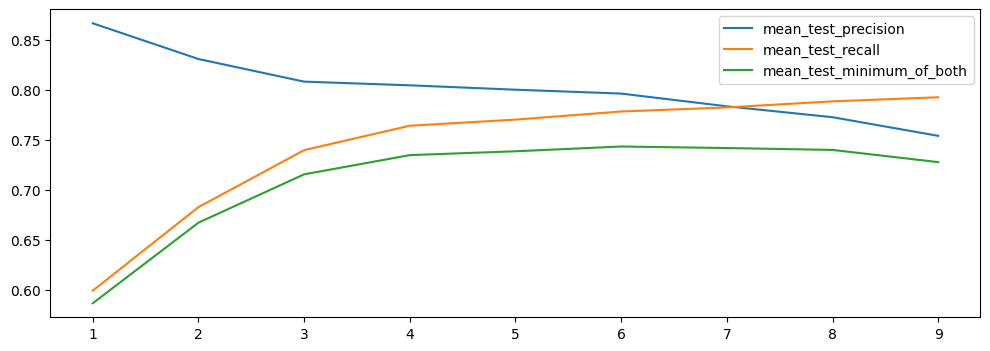

In [34]:
plt.figure(figsize=(12,4))
for i in ['mean_test_precision','mean_test_recall','mean_test_minimum_of_both']:
    plt.plot([j[1] for j in df_results['param_class_weight']],
    df_results[i],
    label=i)
plt.legend()

In [35]:
for k in df_results['param_class_weight']:
    print (k,"  ",k[1])

{0: 1, 1: 1}    1
{0: 1, 1: 2}    2
{0: 1, 1: 3}    3
{0: 1, 1: 4}    4
{0: 1, 1: 5}    5
{0: 1, 1: 6}    6
{0: 1, 1: 7}    7
{0: 1, 1: 8}    8
{0: 1, 1: 9}    9
